In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import seaborn as sns

In [5]:
sns.set()

In [6]:
import matplotlib.pyplot as plt


In [7]:
import os

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shyla\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [9]:

import warnings
warnings.filterwarnings("ignore")

In [10]:
path= '/Users/shyla/Desktop/Dataset/'

In [11]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])

In [12]:
train_text =  pd.read_csv(path+'training_text', sep='\|\|', header=None, skiprows = 1, names=["ID", "Text"])
train_variants =  pd.read_csv(path+'training_variants')

In [13]:
train_text.shape

(3321, 2)

In [14]:
train_variants.shape

(3321, 4)

In [15]:
#merging text with train datas
train = pd.merge(train_variants,train_text, how='left',on='ID')
#left join based on its id

In [16]:
train.isnull().sum()
#print sum of missing values

ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64

In [17]:
#remove missing values such as null in dataset and copies to dataframe train
df_train = train.dropna(axis=0).copy()
#array dimension 
df_train.shape

(3316, 5)

In [18]:
df_train.head()
#gives top 5 rows ->head

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [19]:
df_train

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


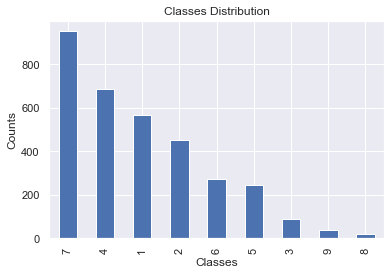

In [20]:
df_train.Class.value_counts().plot(kind="bar",title='Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()
#shows count for classes 1-9

In [21]:
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#getting english stopwords from nltk 
sw_list = stopwords.words('english')


In [23]:
#add punctuation
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', "et al",
'—', '_','et al ',"/"]
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
#eleminating duplicates by adding to set
sw_set = set(sw_list)

In [25]:
print(sw_set)

{'he', 'wouldn', '~', 'an', 'our', 'ourselves', 'because', 'this', "needn't", 've', "that'll", "won't", 'her', 'against', 'mightn', '!', '&', 'ours', "you'd", ']', "you'll", 'am', '``', 'here', "weren't", 'don', 'under', 'over', 'themselves', 'had', 'during', "haven't", 'et al ', 's', 'd', 'being', 'not', 'has', 'yours', 'further', 'only', 'o', 'through', 'to', 'isn', 'shouldn', '(', 'again', '"', 'couldn', 'him', "couldn't", 'after', 'can', 'been', 'between', 'when', "she's", 'it', 'but', 'haven', 'ma', '}', 'below', "aren't", '{', 'we', 'my', 'doesn', 'with', '<', "mustn't", 'in', 'weren', 'then', '|', 'be', 'herself', 'own', 'of', 'theirs', "hadn't", 'was', 'myself', 'very', 'few', '/', 'will', 'didn', 'than', 'yourselves', "you're", 'just', 'there', 'll', 'wasn', 'any', 'their', '_', 'such', 'all', ')', 'them', "should've", '+', '‘', '—', 'more', 'his', 'mustn', 'whom', 'each', 'doing', '^', 'does', 'down', ';', '$', 'no', 'i', '[', 'yourself', 'were', 'some', "wouldn't", 'are', 'o

In [26]:
#tokenization using nltk
#word tokenization is used here -> sentence breaks into words
def process_review(review):
    tokens = nltk.word_tokenize(review)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [27]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(review):
    stemmed_review = []
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review 

In [28]:
# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shyla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
#lemmatixation
#pos = v is verb of that word
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

In [30]:
from datetime import datetime

now = datetime.now()

print("Current Time =", now)

Current Time = 2021-12-15 21:39:02.714324


In [31]:
#obtaining cleaned text data
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    now = datetime.now();
    t_starttime = now.strftime("%H:%M:%S")
    print("start Time tokenization=", t_starttime)
    processed_review=list(map(process_review,review))
    now = datetime.now()
    t_stoptime = now.strftime("%H:%M:%S")
    print("stop Time tokenization=", t_stoptime)
    # stemming
    now = datetime.now()
    l_starttime = now.strftime("%H:%M:%S")
    print("start Time stemming=", l_starttime)
    stemming_reviews=list(map(stemming,processed_review))
    now = datetime.now()
    l_stoptime = now.strftime("%H:%M:%S")
    print("stop Time stemming=", l_stoptime)
    # lemmatization
    now = datetime.now()
    s_starttime = now.strftime("%H:%M:%S")
    print("start Time lemmatization=", s_starttime)
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    now = datetime.now()
    s_stoptime = now.strftime("%H:%M:%S")
    print("stop Time lemmatization=", s_stoptime)
    #print(lemma_reviews)
    return lemma_reviews

In [32]:
cleaned_train_text=data_preprocessing(df_train['Text'])


start Time tokenization= 21:39:07
stop Time tokenization= 21:43:48
start Time stemming= 21:43:48
stop Time stemming= 21:52:08
start Time lemmatization= 21:52:08
stop Time lemmatization= 21:53:29


In [33]:
processed_review=process_review("Recent evidence has demonstrated that acquired uniparental disomy (aUPD)")
newstem = stemming(processed_review)
newlemat  = lemmatization(newstem)
newlemat

['recent', 'evid', 'demonstr', 'acquir', 'uniparent', 'disomi', 'aupd']

In [34]:

import pickle
pickle_out1=open('cleaned_train_text', 'wb')
pickle.dump(cleaned_train_text, pickle_out1)
pickle_out1.close()

In [35]:
import pickle
pickle_in_train = open("cleaned_train_text","rb")
cleaned_train_text = pickle.load(pickle_in_train)

In [36]:
df_train['cleaned_text']=[" ".join(i) for i in cleaned_train_text]

In [37]:
df_train

,ID,Gene,Variation,Class,Text,cleaned_text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin-depend kinas cdk regul varieti fundamen...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non-smal cell lung cancer ...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogen mutat monomer casita b-lineag lymphoma...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduct myelodysplast syndrom md heterogen g...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt-rel transcript factor 1 gene runx1 alias ...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1/aml1 gene frequent target chromosom tran...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
# Apply the function above foe each class
class1 = get_top_n_bigram(df_train[df_train['Class']==1]['cleaned_text'], 30)
class2=  get_top_n_bigram(df_train[df_train['Class']==2]['cleaned_text'], 30)
class3 = get_top_n_bigram(df_train[df_train['Class']==3]['cleaned_text'], 30)
class4 = get_top_n_bigram(df_train[df_train['Class']==4]['cleaned_text'], 30)
class5 = get_top_n_bigram(df_train[df_train['Class']==5]['cleaned_text'], 30)
class6 = get_top_n_bigram(df_train[df_train['Class']==6]['cleaned_text'], 30)
class7 = get_top_n_bigram(df_train[df_train['Class']==7]['cleaned_text'], 30)
class8 = get_top_n_bigram(df_train[df_train['Class']==8]['cleaned_text'], 30)
class9 = get_top_n_bigram(df_train[df_train['Class']==9]['cleaned_text'], 30)

In [41]:
classes_data=[class1[1:],class2[1:],class3[1:],class4[1:],class5[1:],
              class6[1:],class7[1:],class8[1:],class9[1:]]
colors=['r','b','g','pink','c','m','y','aqua','plum']

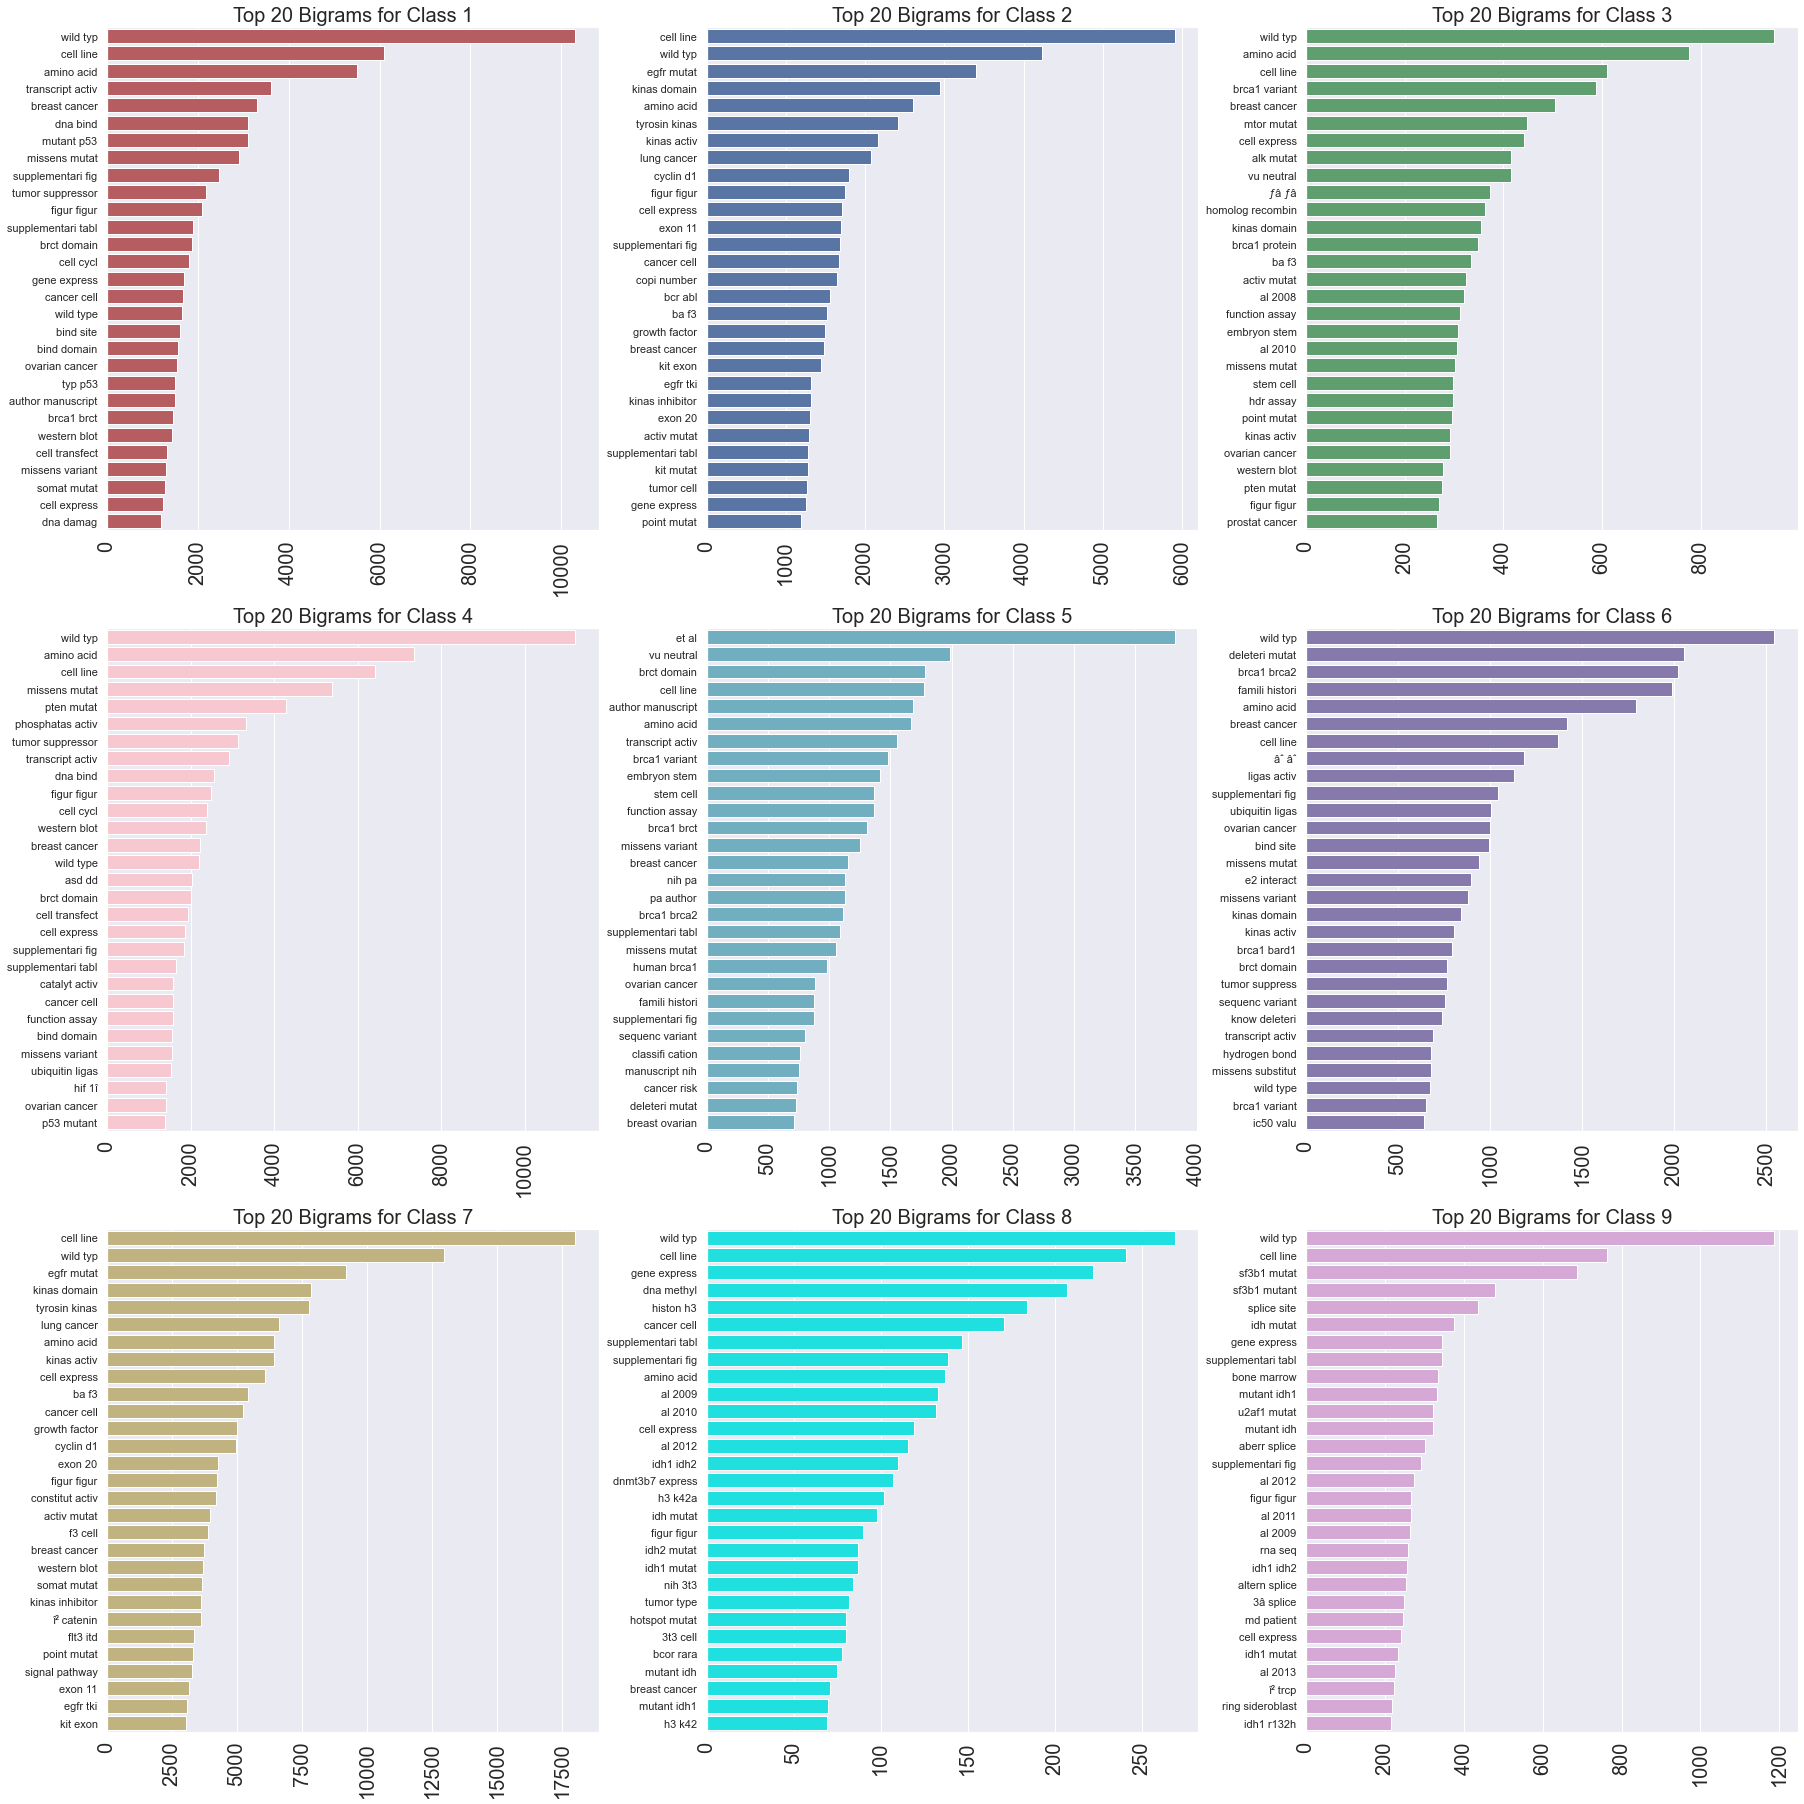

In [42]:
plt.figure(figsize=(25,25))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    x=[x[0] for x in classes_data[i]]
    y=[x[1] for x in  classes_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=20)
    plt.title("Top 20 Bigrams for Class {}".format(i+1),fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [43]:
def get_top_n_ngram(corpus, n=None,k=None):
    vec = CountVectorizer(ngram_range=(k,k )).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
class1t = get_top_n_ngram(df_train[df_train['Class']==1]['cleaned_text'], 30,5)
class2t = get_top_n_ngram(df_train[df_train['Class']==2]['cleaned_text'], 30,5)
class3t = get_top_n_ngram(df_train[df_train['Class']==3]['cleaned_text'], 30,5)
class4t = get_top_n_ngram(df_train[df_train['Class']==4]['cleaned_text'], 30,5)
class5t = get_top_n_ngram(df_train[df_train['Class']==5]['cleaned_text'], 30,5)
class6t = get_top_n_ngram(df_train[df_train['Class']==6]['cleaned_text'], 30,5)
class7t = get_top_n_ngram(df_train[df_train['Class']==7]['cleaned_text'], 30,5)
class8t = get_top_n_ngram(df_train[df_train['Class']==8]['cleaned_text'], 30,5)
class9t = get_top_n_ngram(df_train[df_train['Class']==9]['cleaned_text'], 30,5)

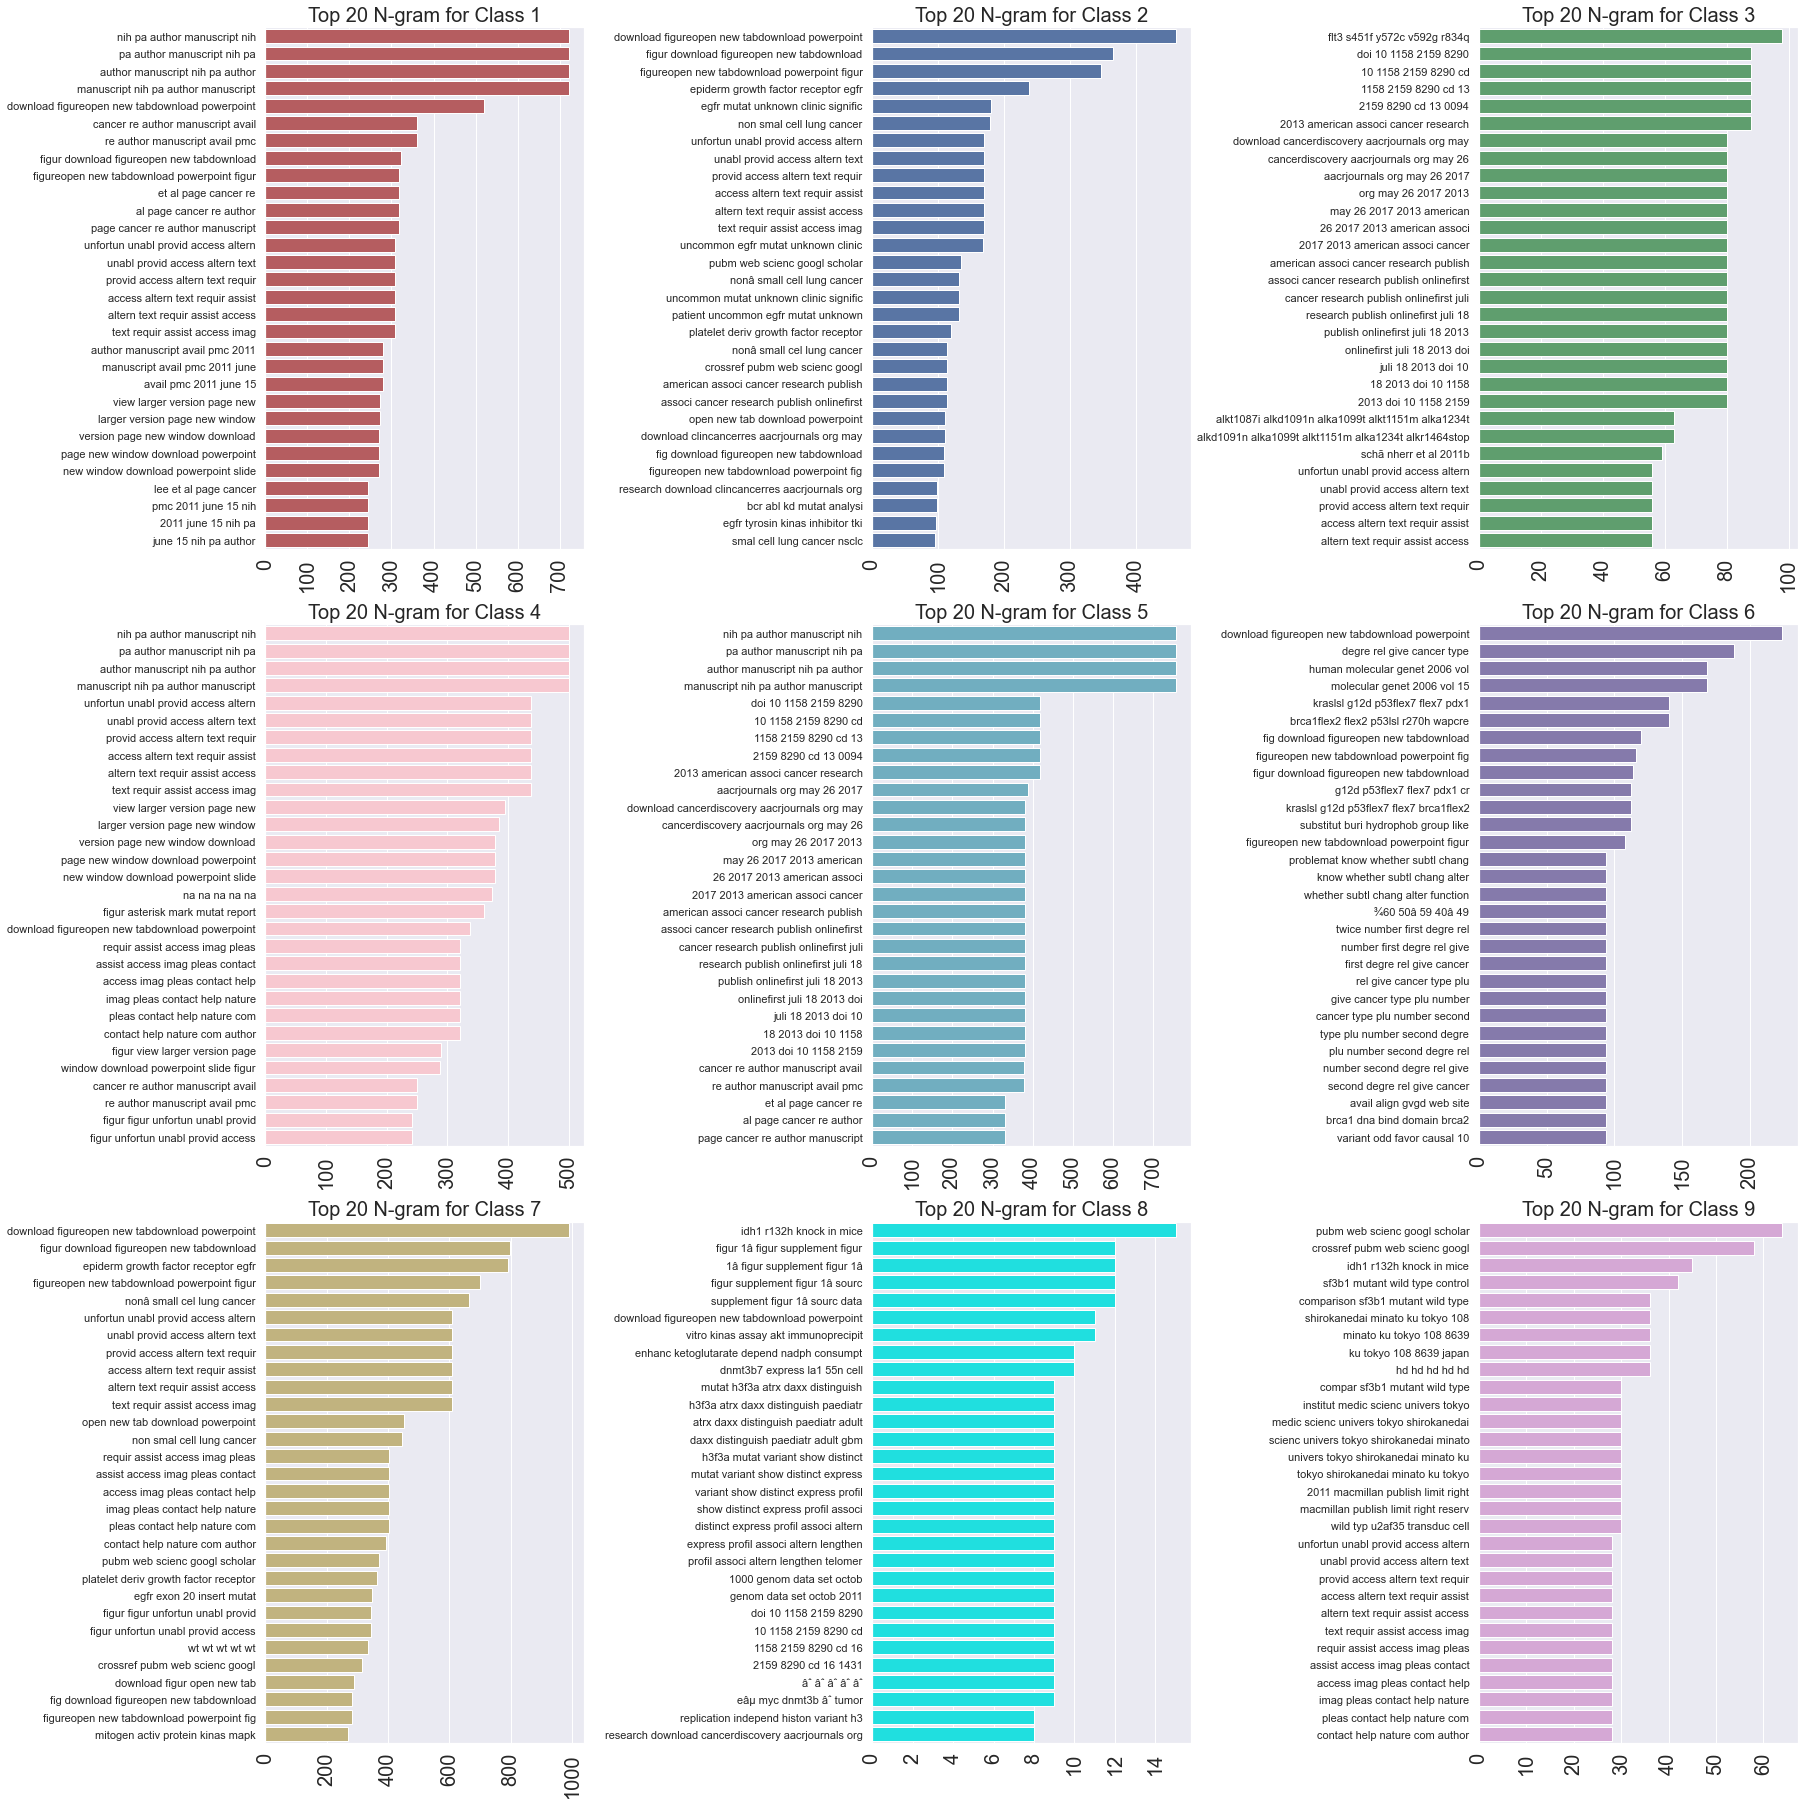

In [45]:
classest_data=[class1t,class2t,class3t,class4t,class5t,
              class6t,class7t,class8t,class9t]
plt.figure(figsize=(25,25))
# good reviews bigrams
for i in range(0,9):
    plt.subplot(3,3,i+1)
    x=[x[0] for x in classest_data[i]]
    y=[x[1] for x in  classest_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=20)
    plt.title("Top 20 N-gram for Class {}".format(i+1),fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [46]:
#declare inputs and target
inputs=df_train[['ID', 'Gene', 'Variation','Class','cleaned_text']]
target=df_train.Class

In [47]:
df_train['cleaned_text']

0       cyclin-depend kinas cdk regul varieti fundamen...
1       abstract background non-smal cell lung cancer ...
2       abstract background non-smal cell lung cancer ...
3       recent evid demonstr acquir uniparent disomi a...
4       oncogen mutat monomer casita b-lineag lymphoma...
                              ...                        
3316    introduct myelodysplast syndrom md heterogen g...
3317    introduct myelodysplast syndrom md heterogen g...
3318    runt-rel transcript factor 1 gene runx1 alias ...
3319    runx1/aml1 gene frequent target chromosom tran...
3320    frequent mutat associ leukemia recurr somat ch...
Name: cleaned_text, Length: 3316, dtype: object

In [48]:
target




0       1
1       2
2       2
3       3
4       4
       ..
3316    4
3317    1
3318    1
3319    4
3320    4
Name: Class, Length: 3316, dtype: int64

In [49]:
#train test cross validation split dataset 64:20:16
from sklearn.model_selection import train_test_split

X_train, test_df, y_train, y_test = train_test_split(inputs, target, stratify=target, test_size=.2)

In [50]:
y_test

1432    4
1871    2
1329    6
1885    7
1827    7
       ..
2675    5
2796    6
251     7
418     1
719     7
Name: Class, Length: 664, dtype: int64

In [51]:
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [52]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2121
Number of data points in test data: 664
Number of data points in cross validation data: 531


In [53]:
#class count
train_class_distribution = train_df['Class'].value_counts()
train_class_distribution

7    609
4    439
1    362
2    289
6    174
5    155
3     57
9     24
8     12
Name: Class, dtype: int64

In [54]:
cv_df

,ID,Gene,Variation,Class,cleaned_text
116,116,KMT2D,Truncating Mutations,1,kabuki syndrom ks multipl congenit anomali syn...
2558,2558,BRCA1,P1806A,5,abstract germlin mutat inactiv tumor suppresso...
2488,2488,BRCA1,W1782C,5,mutat brca1 brca2 account major hereditari bre...
3268,3268,RET,E921K,4,mani missens mutat ret proto-oncogen find fami...
1345,1345,AKT1,L362R,3,protein kinas v-akt murin thymoma viral oncoge...
...,...,...,...,...,...
753,753,ERBB2,P780L,2,purpos mutat associ resist kinas inhibit impor...
1961,1961,NUP93,K442Nfs*,1,abstract nucleoporin nup essenti compon nuclea...
1501,1501,FGFR4,N535K,7,rhabdomyosarcoma rm childhood cancer origin sk...
2183,2183,PTEN,V217D,4,pten phosphatas tensin homolog phosphatas uniq...


In [55]:
train_class_distribution

7    609
4    439
1    362
2    289
6    174
5    155
3     57
9     24
8     12
Name: Class, dtype: int64

In [56]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

In [57]:
#sorted
train_class_distribution

1    362
2    289
3     57
4    439
5    155
6    174
7    609
8     12
9     24
Name: Class, dtype: int64

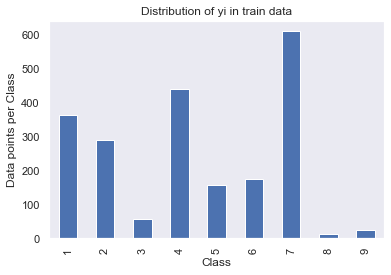

In [58]:
#count of classes plotted
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [59]:
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

Number of data points in class 7 : 609 ( 28.713 %)
Number of data points in class 4 : 439 ( 20.698 %)
Number of data points in class 1 : 362 ( 17.067 %)
Number of data points in class 2 : 289 ( 13.626 %)
Number of data points in class 6 : 174 ( 8.204 %)
Number of data points in class 5 : 155 ( 7.308 %)
Number of data points in class 3 : 57 ( 2.687 %)
Number of data points in class 9 : 24 ( 1.132 %)
Number of data points in class 8 : 12 ( 0.566 %)


--------------------------------------------------------------------------------


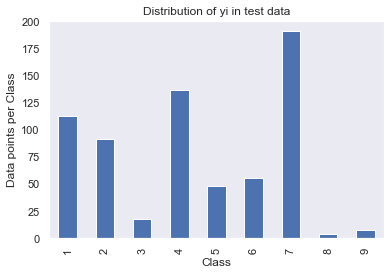

In [60]:
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

In [61]:
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

Number of data points in class 7 : 191 ( 28.765 %)
Number of data points in class 4 : 137 ( 20.633 %)
Number of data points in class 1 : 113 ( 17.018 %)
Number of data points in class 2 : 91 ( 13.705 %)
Number of data points in class 6 : 55 ( 8.283 %)
Number of data points in class 5 : 48 ( 7.229 %)
Number of data points in class 3 : 18 ( 2.711 %)
Number of data points in class 9 : 7 ( 1.054 %)
Number of data points in class 8 : 4 ( 0.602 %)


--------------------------------------------------------------------------------


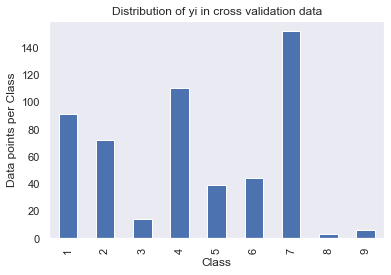

Number of data points in class 7 : 152 ( 28.625 %)
Number of data points in class 4 : 110 ( 20.716 %)
Number of data points in class 1 : 91 ( 17.137 %)
Number of data points in class 2 : 72 ( 13.559 %)
Number of data points in class 6 : 44 ( 8.286 %)
Number of data points in class 5 : 39 ( 7.345 %)
Number of data points in class 3 : 14 ( 2.637 %)
Number of data points in class 9 : 6 ( 1.13 %)
Number of data points in class 8 : 3 ( 0.565 %)


In [62]:
print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

In [63]:
newempty = []
def get_gv_fea_dict(alpha, feature, df):
    # train_df['Gene'].value_counts()
    #         BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    # train_df['Variation'].value_counts()
    
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    #Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    for i, denominator in value_count.items():
        # vec will contain probability of gene/variation belongs to perticular class
        
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
           
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            #print(row[feature])
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [64]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 220
BRCA1     172
TP53      100
EGFR       94
PTEN       81
BRCA2      76
KIT        61
BRAF       59
ALK        46
ERBB2      42
PIK3CA     41
Name: Gene, dtype: int64


In [65]:
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [66]:
train_gene_feature_responseCoding

array([[0.12087912, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       [0.19811321, 0.09433962, 0.09433962, ..., 0.09433962, 0.09433962,
        0.09433962],
       [0.07352941, 0.10294118, 0.11764706, ..., 0.30882353, 0.07352941,
        0.07352941],
       ...,
       [0.1010101 , 0.12121212, 0.1010101 , ..., 0.16161616, 0.1010101 ,
        0.1010101 ],
       [0.11578947, 0.10526316, 0.10526316, ..., 0.10526316, 0.10526316,
        0.10526316],
       [0.18320611, 0.03816794, 0.07633588, ..., 0.03816794, 0.03816794,
        0.03816794]])

In [67]:
# one-hot encoding of Gene feature.
from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [68]:
temp_list = []
for i in test_gene_feature_onehotCoding:
    temp_list.append(list(i.A[0]))

#print(temp_list)

In [69]:
#gene_vectorizer.get_feature_names()

In [70]:
train_gene_feature_onehotCoding.shape

(2121, 220)

In [71]:
type(train_gene_feature_onehotCoding)


scipy.sparse.csr.csr_matrix

In [72]:
train_gene_feature_onehotCoding.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1923
Truncating Mutations         56
Deletion                     49
Amplification                48
Fusions                      26
Overexpression                4
E17K                          3
Q209L                         2
F28L                          2
I31M                          2
Promoter Hypermethylation     2
Name: Variation, dtype: int64


In [74]:
unique_variations.shape[0]

1923

In [75]:
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [76]:
train_variation_feature_responseCoding.shape

(2121, 9)

In [77]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [78]:
train_variation_feature_onehotCoding.shape

(2121, 1956)

In [79]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['cleaned_text'].split():
            dictionary[word] +=1
    return dictionary

In [80]:
import math
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['cleaned_text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['cleaned_text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [81]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['cleaned_text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
train_text_fea_counts
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 49852


In [82]:
#train_text_features

In [83]:
from collections import Counter, defaultdict
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list
    #print(dict_list)
# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)

confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [84]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [85]:
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [86]:
from sklearn.preprocessing import normalize
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['cleaned_text'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['cleaned_text'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [88]:
cv_text_feature_onehotCoding
# Accuracy
from sklearn.metrics import accuracy_score


## Machine Learning Models

In [89]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [90]:

def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [91]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['cleaned_text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [92]:
from scipy.sparse import hstack
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [93]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2121, 52028)
(number of data points * number of features) in test data =  (664, 52028)
(number of data points * number of features) in cross validation data = (531, 52028)


In [94]:

print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2121, 27)
(number of data points * number of features) in test data =  (664, 27)
(number of data points * number of features) in cross validation data = (531, 27)


#### NAIVE BAYES 


for alpha = 1e-05
Log Loss : 1.250498747362395
for alpha = 0.0001
Log Loss : 1.2430712249141398
for alpha = 0.001
Log Loss : 1.2417651841946769
for alpha = 0.1
Log Loss : 1.2420613037851507
for alpha = 1
Log Loss : 1.2515870682401355
for alpha = 10
Log Loss : 1.3913294445418107
for alpha = 100
Log Loss : 1.3280619862045326
for alpha = 1000
Log Loss : 1.2416913848724795


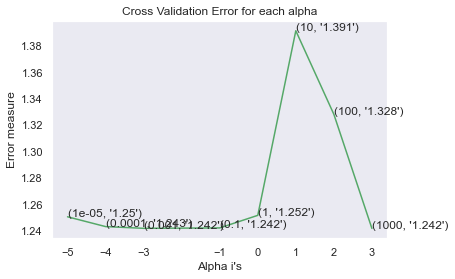

For values of best alpha =  1000 The train log loss is: 1.0311684350948327
For values of best alpha =  1000 The cross validation log loss is: 1.2416913848724795
For values of best alpha =  1000 The test log loss is: 1.2662646325295537


In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [98]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(C, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    #fig.set_size_inches(18.5, 10.5)
    plt.show()
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(B, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    df_cm = pd.DataFrame(A, index = [i for i in "123456789"],
    columns = [i for i in "123456789"])
    lines = df_cm.plot.line()
    plt.show()
    print('Accuracy:', accuracy_score(test_y, predict_y))
    

## Testing the model

Log Loss : 1.2416913848724795
Number of missclassified point : 0.4350282485875706
-------------------- Confusion matrix --------------------


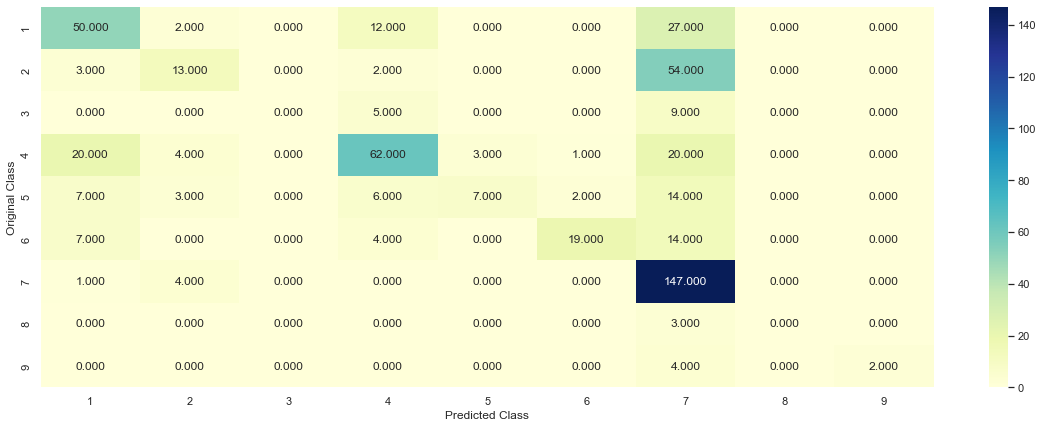

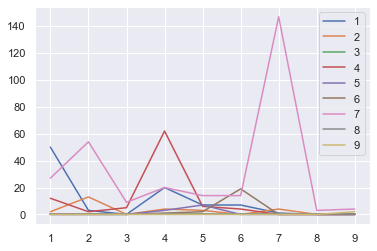

-------------------- Precision matrix (Columm Sum=1) --------------------


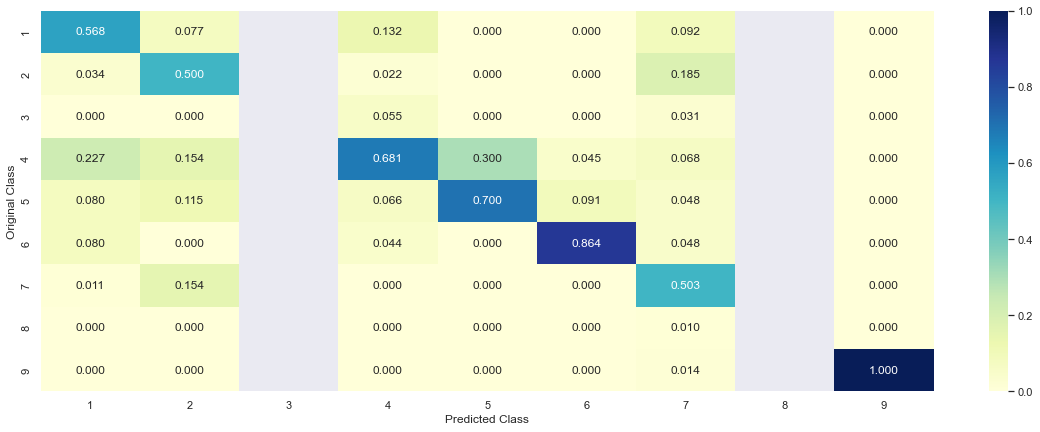

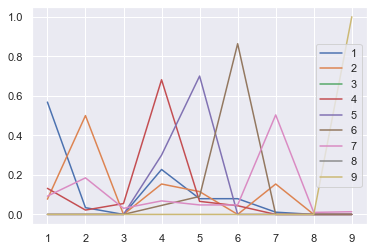

-------------------- Recall matrix (Row sum=1) --------------------


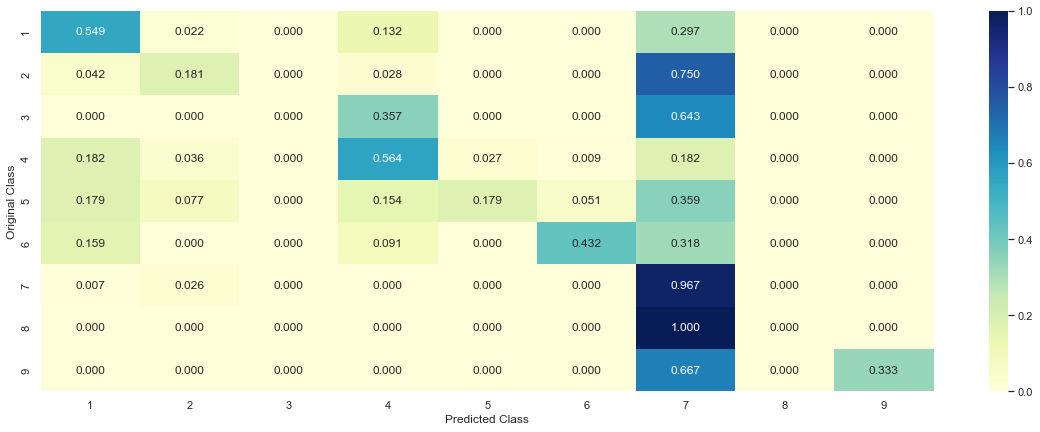

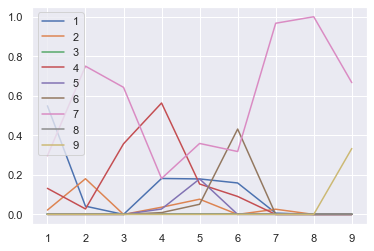

Accuracy: 0.5649717514124294


In [99]:
from sklearn.metrics import confusion_matrix
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

In [100]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4548 0.038  0.0059 0.2034 0.0249 0.0327 0.2343 0.0044 0.0016]]
Actual Class : 1
--------------------------------------------------
14 Text feature [affect] present in test data point [True]
15 Text feature [protein] present in test data point [True]
16 Text feature [remain] present in test data point [True]
17 Text feature [specif] present in test data point [True]
18 Text feature [contain] present in test data point [True]
19 Text feature [sequenc] present in test data point [True]
20 Text feature [two] present in test data point [True]
21 Text feature [dna] present in test data point [True]
22 Text feature [larg] present in test data point [True]
23 Text feature [indic] present in test data point [True]
24 Text feature [region] present in test data point [True]
25 Text feature [reduc] present in test data point [True]
27 Text feature [bind] present in test data point [True]
29 Text feature [possibl] present in test data point [Tr

## K Nearest Neighbour Classification

for alpha = 5
Log Loss : 1.0865481861052215
for alpha = 11
Log Loss : 1.0978449603475258
for alpha = 15
Log Loss : 1.1036118127661778
for alpha = 21
Log Loss : 1.1064694989301758
for alpha = 31
Log Loss : 1.1275430732094107
for alpha = 41
Log Loss : 1.1166481349085737
for alpha = 51
Log Loss : 1.113995578603853
for alpha = 99
Log Loss : 1.1376542534258987


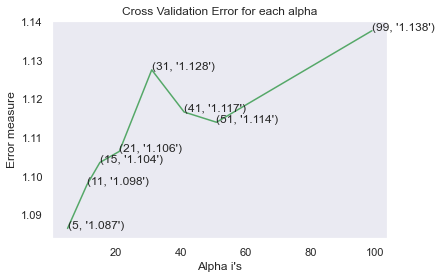

For values of best alpha =  5 The train log loss is: 0.41750429482784485
For values of best alpha =  5 The cross validation log loss is: 1.0865481861052215
For values of best alpha =  5 The test log loss is: 1.1216911165582564


In [101]:
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0865481861052215
Number of mis-classified points : 0.3427495291902072
-------------------- Confusion matrix --------------------


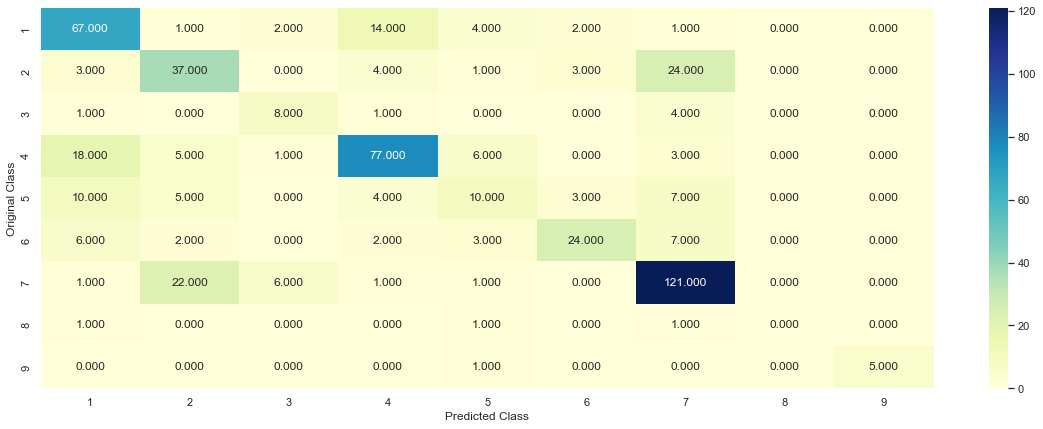

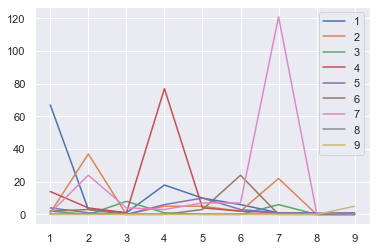

-------------------- Precision matrix (Columm Sum=1) --------------------


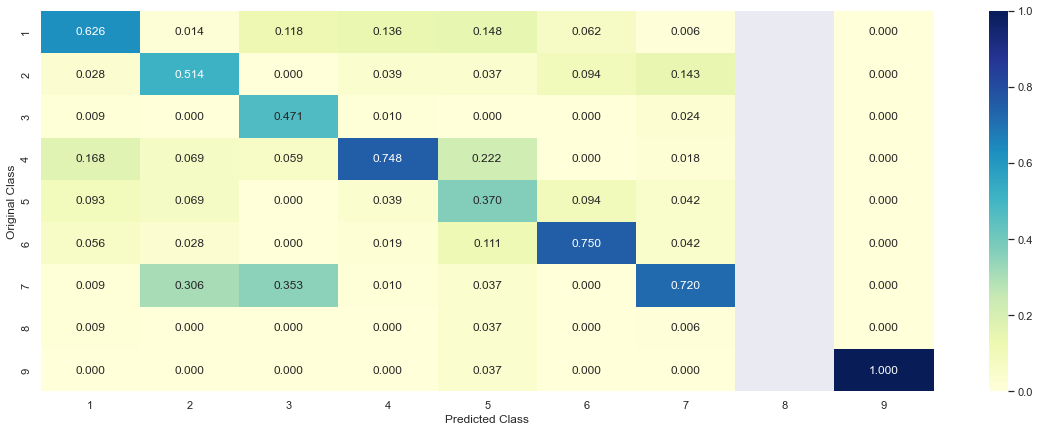

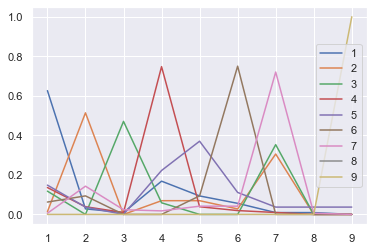

-------------------- Recall matrix (Row sum=1) --------------------


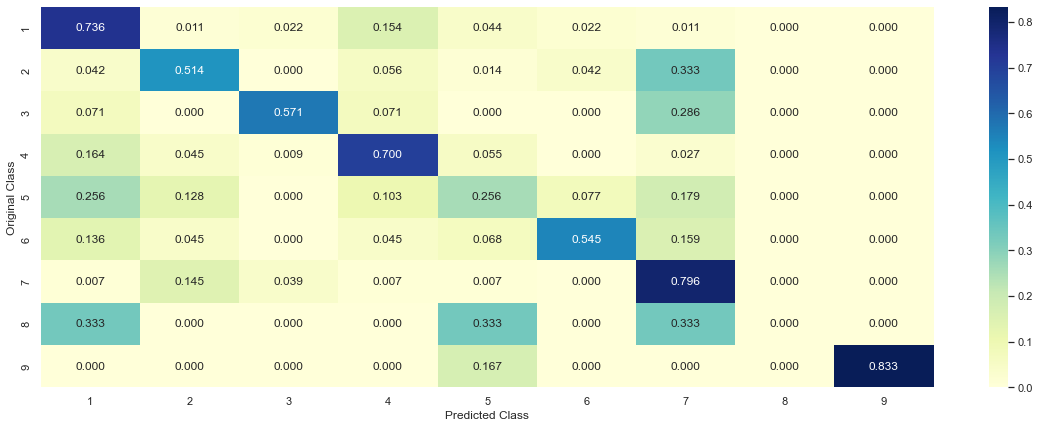

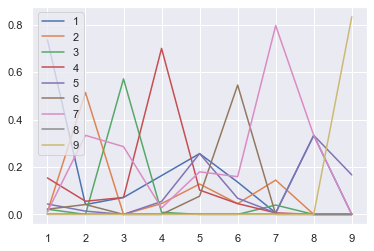

Accuracy: 0.6572504708097928


In [102]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

In [103]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 25

predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 2
The  5  nearest neighbours of the test points belongs to classes [6 6 7 6 2]
Fequency of nearest points : Counter({6: 3, 7: 1, 2: 1})


## Linear Support Vector Machines

for C = 1e-05
Log Loss : 1.3341248956778868
for C = 0.0001
Log Loss : 1.2466976014989144
for C = 0.001
Log Loss : 1.1523947045509528
for C = 0.01
Log Loss : 1.173863383559164
for C = 0.1
Log Loss : 1.2991283599885752
for C = 1
Log Loss : 1.676536399136481
for C = 10
Log Loss : 1.6889924685250208
for C = 100
Log Loss : 1.6889925428468846


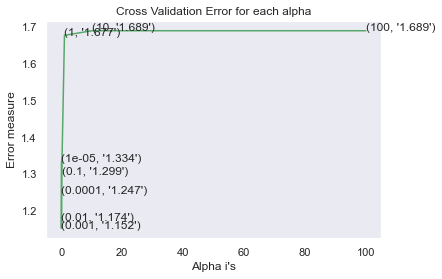

For values of best alpha =  0.001 The train log loss is: 0.5064832843818468
For values of best alpha =  0.001 The cross validation log loss is: 1.1523947045509528
For values of best alpha =  0.001 The test log loss is: 1.1831237750066914


In [104]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.1523947045509528
Number of mis-classified points : 0.3465160075329567
-------------------- Confusion matrix --------------------


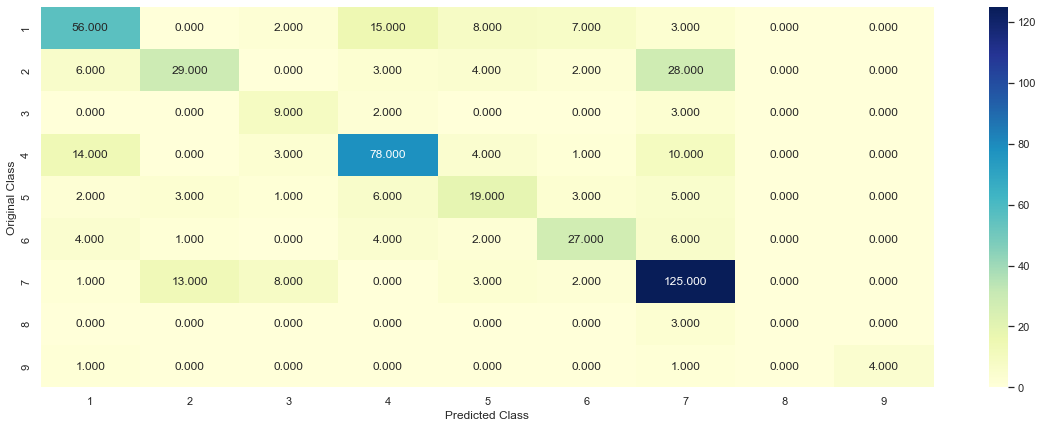

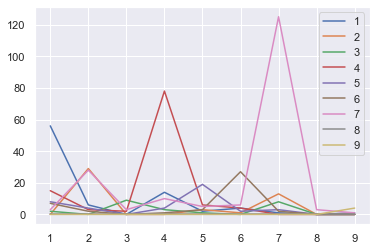

-------------------- Precision matrix (Columm Sum=1) --------------------


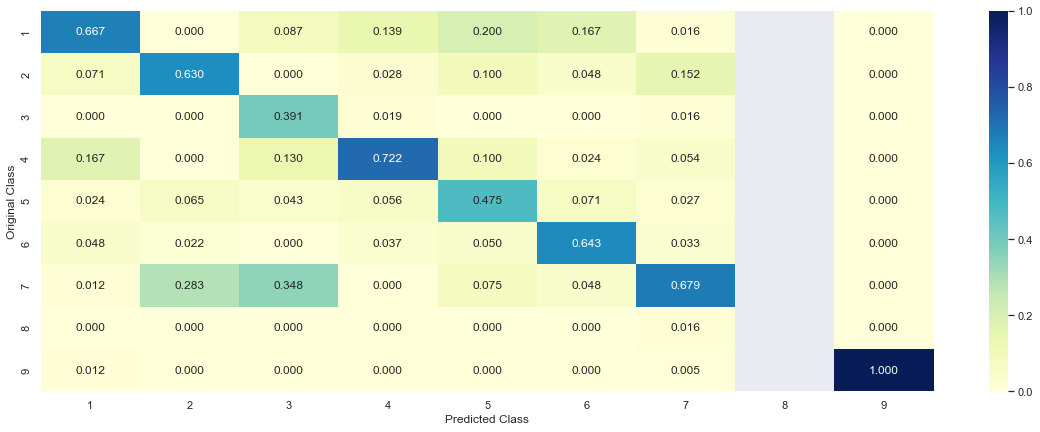

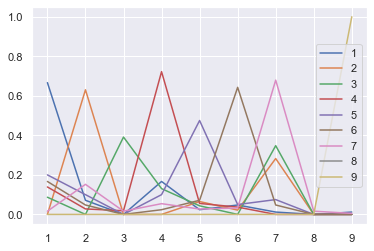

-------------------- Recall matrix (Row sum=1) --------------------


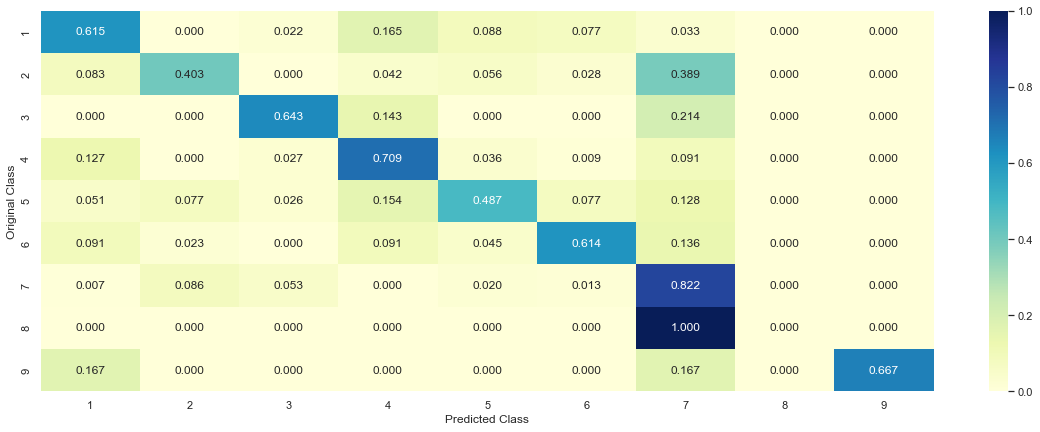

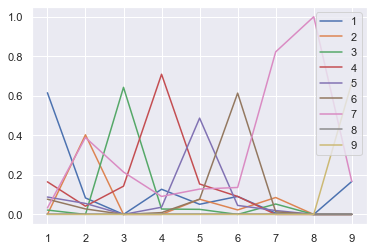

Accuracy: 0.6534839924670434


In [105]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [106]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4558 0.0275 0.0112 0.3063 0.0165 0.0125 0.1616 0.0044 0.0042]]
Actual Class : 1
--------------------------------------------------
341 Text feature [paralog] present in test data point [True]
432 Text feature [pick] present in test data point [True]
Out of the top  500  features  2 are present in query point


In [107]:
train_y

array([1, 1, 7, ..., 7, 1, 6])

## LOGISTIC REGRESSION

for alpha = 1e-06
Log Loss : 1.3478502877755763
for alpha = 1e-05
Log Loss : 1.273590259847996
for alpha = 0.0001
Log Loss : 1.1184178103819986
for alpha = 0.001
Log Loss : 1.084305663774051
for alpha = 0.01
Log Loss : 1.1125221742143556
for alpha = 0.1
Log Loss : 1.4081671778329619
for alpha = 1
Log Loss : 1.6535807173323558
for alpha = 10
Log Loss : 1.6850247753166807
for alpha = 100
Log Loss : 1.6883943037273188


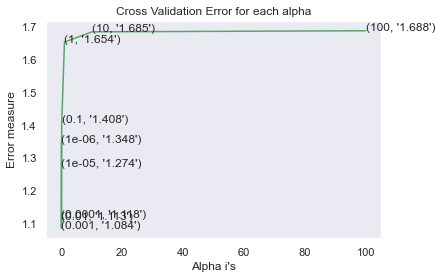

For values of best alpha =  0.001 The train log loss is: 0.49682022458034986
For values of best alpha =  0.001 The cross validation log loss is: 1.084305663774051
For values of best alpha =  0.001 The test log loss is: 1.1422858469142554


In [108]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.084305663774051
Number of mis-classified points : 0.3465160075329567
-------------------- Confusion matrix --------------------


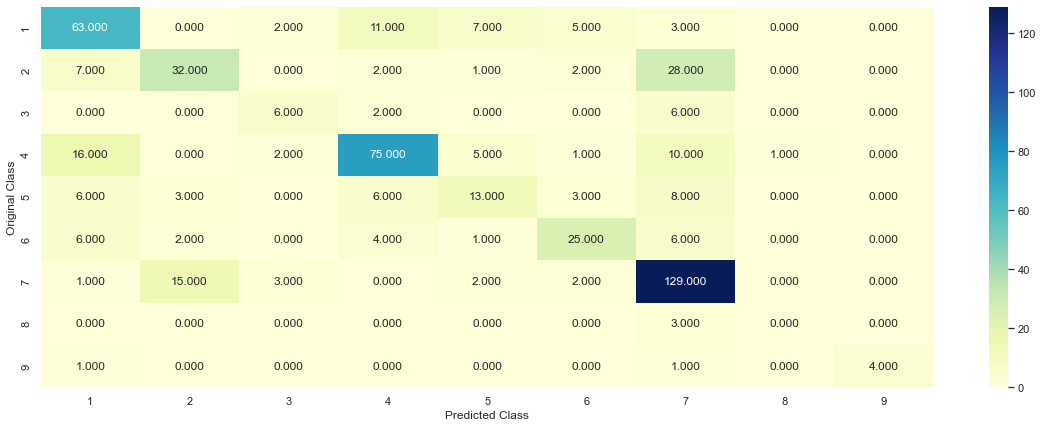

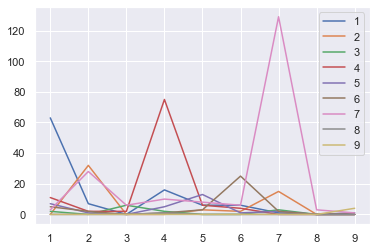

-------------------- Precision matrix (Columm Sum=1) --------------------


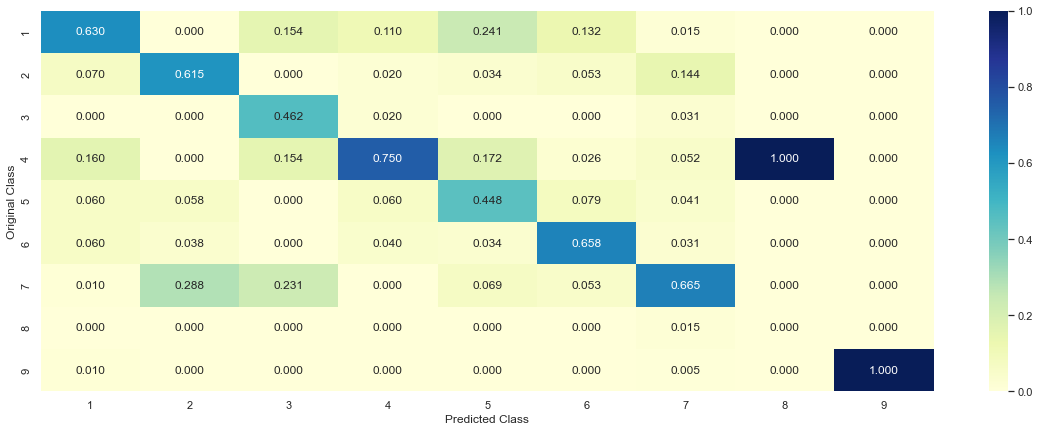

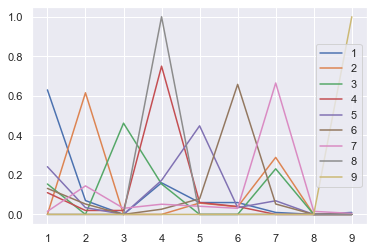

-------------------- Recall matrix (Row sum=1) --------------------


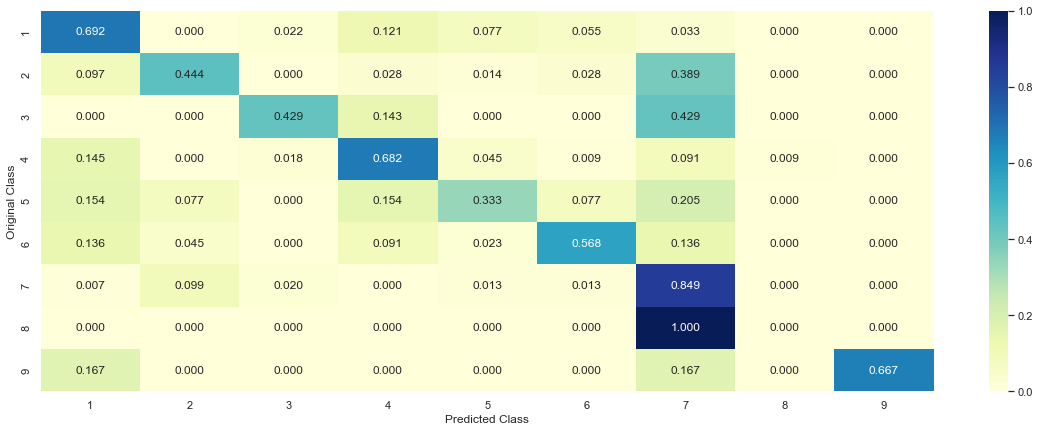

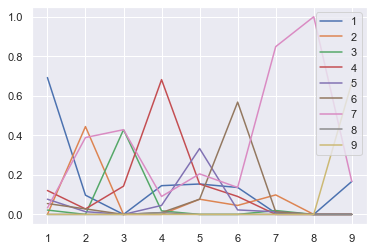

Accuracy: 0.6534839924670434


In [109]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [110]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

In [111]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 10
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0107 0.6923 0.0008 0.012  0.0039 0.0011 0.2746 0.0035 0.0011]]
Actual Class : 7
--------------------------------------------------
278 Text feature [prephosphoryl] present in test data point [True]
312 Text feature [rearrang] present in test data point [True]
457 Text feature [garnett] present in test data point [True]
461 Text feature [fusion] present in test data point [True]
Out of the top  500  features  4 are present in query point


## Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2665277993029505
for n_estimators = 100 and max depth =  10
Log Loss : 1.1810241636054781
for n_estimators = 200 and max depth =  5
Log Loss : 1.253455192567748
for n_estimators = 200 and max depth =  10
Log Loss : 1.178746574361901
for n_estimators = 500 and max depth =  5
Log Loss : 1.246134421864926
for n_estimators = 500 and max depth =  10
Log Loss : 1.173099279773666
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2480982788266106
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1718637723327194
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2490447399886282
for n_estimators = 2000 and max depth =  10
Log Loss : 1.173668029074752
For values of best estimator =  1000 The train log loss is: 0.6795090425405285
For values of best estimator =  1000 The cross validation log loss is: 1.1718637723327194
For values of best estimator =  1000 The test log loss is: 1.1795648833692092


Log loss : 1.1718637723327194
Number of mis-classified points : 0.3766478342749529
-------------------- Confusion matrix --------------------


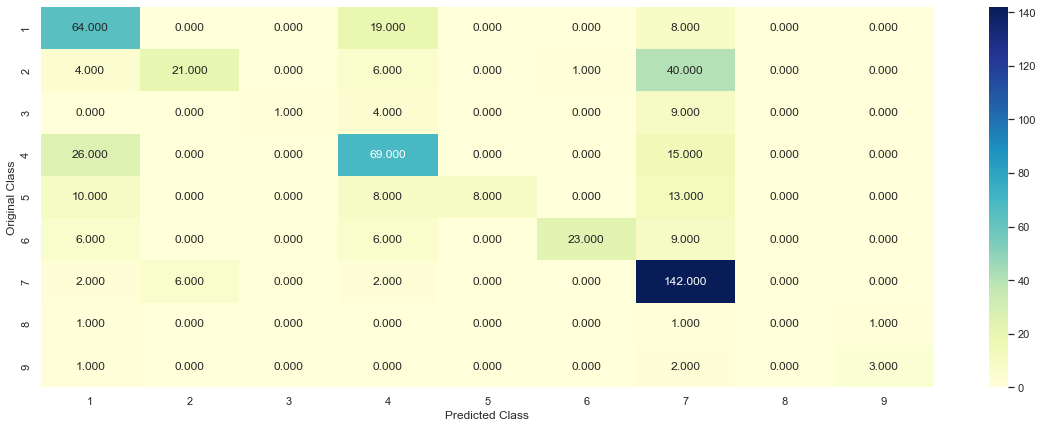

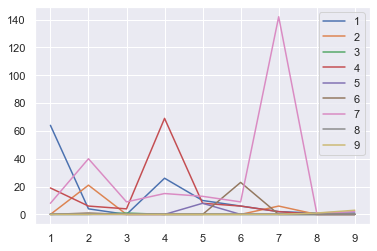

-------------------- Precision matrix (Columm Sum=1) --------------------


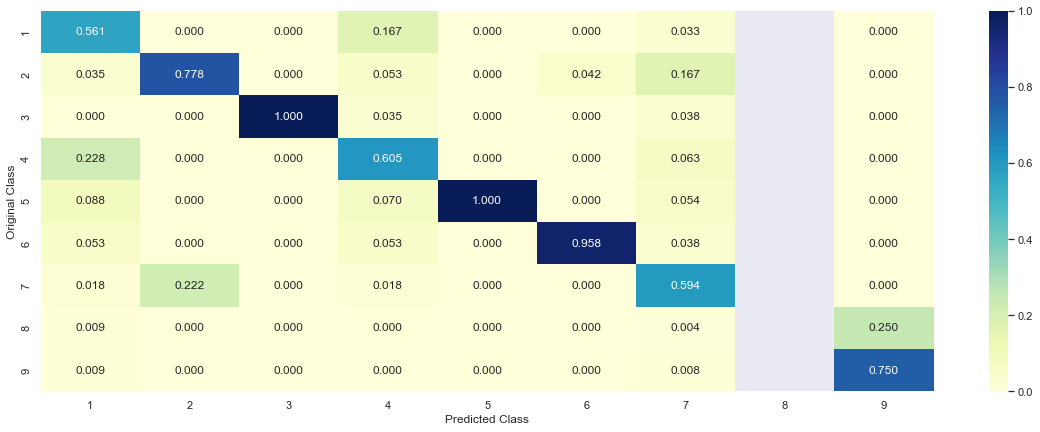

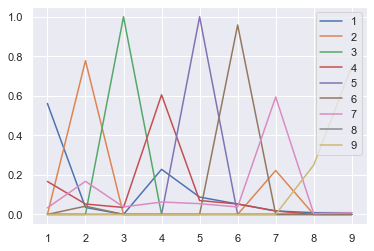

-------------------- Recall matrix (Row sum=1) --------------------


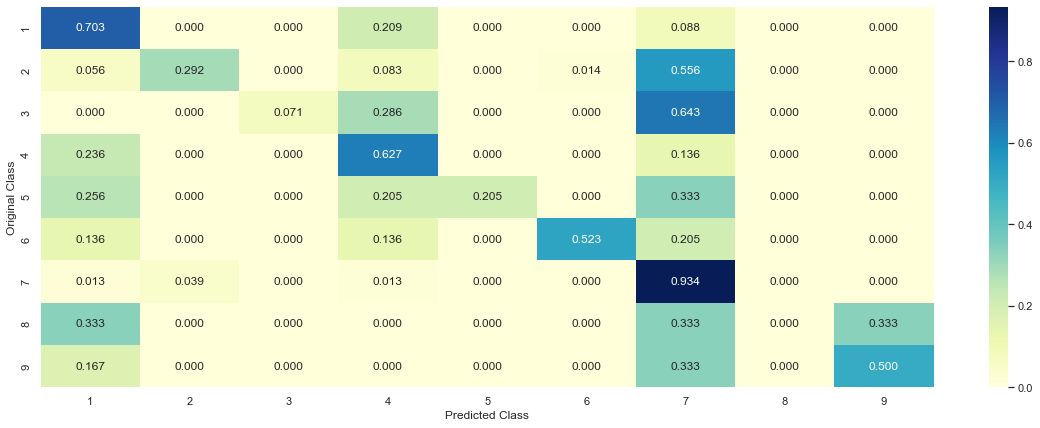

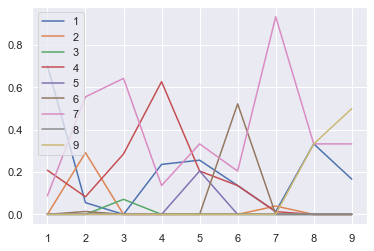

Accuracy: 0.623352165725047


In [114]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

In [115]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['cleaned_text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0927 0.386  0.0164 0.0798 0.041  0.0284 0.3409 0.0066 0.0083]]
Actual Class : 7
--------------------------------------------------
0 Text feature [kinas] present in test data point [True]
2 Text feature [suppressor] present in test data point [True]
3 Text feature [inhibitor] present in test data point [True]
4 Text feature [treatment] present in test data point [True]
5 Text feature [phosphoryl] present in test data point [True]
6 Text feature [function] present in test data point [True]
7 Text feature [therapeut] present in test data point [True]
8 Text feature [growth] present in test data point [True]
9 Text feature [oncogen] present in test data point [True]
14 Text feature [signal] present in test data point [True]
16 Text feature [akt] present in test data point [True]
17 Text feature [erk] present in test data point [True]
18 Text feature [3t3] present in test data point [True]
20 Text feature [loss] present in test data po

## CNN

In [116]:
class Text(object):

    def __init__(self,id,text,gene,mutation,category):
        self.id = id
        self.text = text
        self.gene = gene
        self.mutation = mutation
        self.category = category

In [119]:
def read_training_data (training_text,training_variants):

    list_train = list();
    with open (training_text, encoding='utf8') as file_input:
        for line in file_input:
            line = line.strip()
            array_splits = line.split('||')
            if len(array_splits)<2 :
                continue
            list_train.append(Text(array_splits[0],(array_splits[1])," "," "," "))
    #print(list_train)

    i = 0
    k = 0
    with open(training_variants) as file_input:
        for line in file_input:
            line = line.strip()
            k = k+1
            if (k==1):
                continue
            array_splits = line.split(',')
            list_train[i].gene = array_splits[1]
            list_train[i].mutation = array_splits[2]
            list_train[i].category = int(array_splits[3])-1
            i = i+1

    return list_train

In [120]:
#keras imports
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Input
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten, LSTM
from keras.models import Sequential

#scikit learn imports
from keras.preprocessing.text import one_hot
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import log_loss, accuracy_score
from sklearn.utils import class_weight

#general python imports
import gensim

In [123]:
def CNN_LEARN(training_list):
    text_train = [];
    score_train = [];
    for text in training_list:
        text_train.append(text.text);
        score_train.append(int(text.category));
    
    vocab_size = 5000
    max_len = 500
    
    texts = text_train
    myclass_weight = class_weight.compute_class_weight('balanced', np.unique(score_train), score_train)
    score_train = to_categorical(score_train, num_classes=9)
    MAX_NO_WORDS = 1000
    
    #this will restrict the index only top 1000 words in document
    tokenizer = Tokenizer(lower=False)
    
    #fit the tokenizer on texts
    tokenizer.fit_on_texts(texts)
    word_index = tokenizer.word_index
    
    #convert the sentecess in text to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    encoded_text_train = [one_hot(d, vocab_size) for d in texts]
    
    #check the number of unique tokens
    #word_index = tokenizer.word_index
    #print('Found %s unique tokens.' % len(word_index))

    #keep the sequence lengths of fixed size, if > then truncate, else pad with 0
    #MAX_SEQUENCE_LENGTH = 300
    data = pad_sequences(encoded_text_train, maxlen=max_len)
    #assume x_train, x_test, y_train, y_test variables contain the required data
    #populate the data accordingly.

    #load the word embeddings from the pretrained word vectors and get a dictionary
    embeddings_index = {}
    embedding_vector_length = 100

    #split the data into training and test set	
    x_train, x_test, y_train, y_test = train_test_split(data, score_train, test_size = 0.2, random_state = 42, stratify=score_train)
    
    #load pretrained word model
    w2v = gensim.models.Word2Vec.load('/Users/shyla/Desktop/Dataset/w2vmodeladdeddata').wv
    #word_index = w2v.word_index
    number_found = 0
    number_not_found = 0

    #create the emeddinig matrix based on the words in vocab in and the embdedding vecrtors
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_vector_length))
    for word, i in word_index.items():
        if word in w2v.key_to_index:
            embedding_vector = w2v[word]
            embedding_matrix[i] = embedding_vector
            number_found += 1
            continue
        number_not_found += 1

    #create an embedding layer with the embeddings created above
    embedding_layer = Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length = max_len, trainable=False)
    ##print(x_train.shape)
    print('Number of embeddings found: {}'.format(number_found))
    model = Sequential()
    
    
    #This below model is a cnn architecture implemented according to the Medical Text Classification using CNN paper
    #model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_len))

    #model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_len))

    #This is the CNN architecture that gave the best results. It has two sets of two 1D Conv layers followed by a MaxPooling Layer
    #The number of fileters is restricted to 100 and two dropout layers are used to prevent overfitting
    model.add(embedding_layer)
    model.add(Conv1D(filters=100, kernel_size=4, activation='relu'))
    model.add(Conv1D(filters=100, kernel_size=4, activation='relu'))
    
    model.add(MaxPooling1D(3))
    #model.add(Flatten())
    model.add(Conv1D(filters=100, kernel_size=4, activation='relu'))
    #model.add(MaxPooling1D(3))
    #model.add(Flatten())
    model.add(Conv1D(filters=100, kernel_size=4, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', name='dense1'))
    model.add(Dropout(0.5))
    model.add(Dense(9, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_crossentropy'])
    
    print(model.summary())
#print(y_train.shape)

    #Trained the built model on the training data
    model.fit(x_train, y_train, nb_epoch=5, batch_size=64, class_weight=myclass_weight)

    #Evaluate the scores of the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    probas = model.predict(x_test)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.array(range(0,9))
    preds = classes[pred_indices]
    #model.save('../models/cnn_model4.h5')
    print('Log loss: {}'.format(log_loss(classes[np.argmax(y_test, axis=1)], probas)))
    print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(y_test, axis=1)], preds)))	
    
training_variants_filename = "/Users/shyla/Desktop/Dataset/training_variants"
training_text_filename = "/Users/shyla/Desktop/Dataset/training_text"
training_list = read_training_data(training_text_filename,training_variants_filename)
print ("Done Reading File")
CNN_LEARN(training_list)

Done Reading File
Number of embeddings found: 135004
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          20294600  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 497, 100)          40100     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 494, 100)          40100     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 164, 100)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 161, 100)          40100     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 158, 100)          40100     
_________________________________________________________________
m